# Capstone:  Broadway

### Objective:


Predict gross revenue & ticket price of currently playing and future Broadway shows

### Progress:

The end database will entirely be my own work.  There is no existing cohesive database available.  The Broadway League runs the site Internet Broadway Database with show info, gross revenue & attendance records dating back to 1984.  The scraping process is a timely endeavor that I have made progress with. 

### Hypothesis

I can build a predictive model based on these important features: 

- Play or Musical:  Musical demanding higher price
- Original or Revival:  Revival demanding higher price
- Cast Size:  Large number of performers demands higher price
- Theatre capacity:  While capacity obviously increases your potential revenue, there will be a supply/ demand factor in this that may make this feature less important. For ex:  Hamilton can only sell 11,000 tix a week and thereform demands higher ticket prices and Lion King has a huge theatre that demands lower ticket prices both fill 95% of seats
- Music by/ Lyrics by/ Book by/ Written by:  StarPower will demand higher price
- Tony Awards Won:  Will increase price
- Theatre choice:  Affects capacity/ prime location demands higher price

### Risks

- Only about 10% of shows make it on Broadway past 1 year 
- It may be difficult to predict the successful outliers 

- Comparing data across different eras as ticket prices continue to increase
- The ticket price of a show in the 1980s will be different from a new show in 2017/ 2018

- The data is not easily accessible 

- Broadway is one of the riskiest entertainment investments due to unknown reasons for why shows are successful & not successful.  On one hand, this makes the project fun and exciting.  On the other hand, the end result could be dissapointing.

## Internet Broadway Database

Features Available:
- Play or Musical
- Original Work or Revival
- Genre & Sub-Genre
- Theatre
- Performance Counts (Run time)
- Cast Size
- Theatre Capacity (seats available per show)
- Opening Date
- Closing Date

1,146 Broadway shows since year 1984 (not including 1-night special shows or charity shows)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df = pd.read_csv('Broadway - Copy of Main-4.csv')

In [52]:
df.drop(['Order', 'ID'], axis = 1, inplace= True)

In [53]:
df.head()

,Theatre,Name,Original_Revival,Play_Musical,Genre,Sub_Genre,Opening,Closing,Performance Count,Cast Size,Capacity
0,Bernard B. Jacobs,MASTER HAROLD…and the boys,Revival,Play,Drama,NaN,"Jun 01, 2003","Jul 13, 2003",49,5,1078
1,John Golden,"night, Mother",Original,Play,NaN,NaN,"Mar 31, 1983","Feb 26, 1984",380,4,805
2,Bernard B. Jacobs,"night, Mother",Revival,Play,Drama,NaN,"Nov 14, 2004","Jan 09, 2005",65,4,1078
3,Lyceum,[title of show],Original,Musical,Comedy,NaN,"Jul 17, 2008","Oct 12, 2008",102,6,922
4,Studio 54,110 in the Shade,Revival,Musical,NaN,NaN,"May 09, 2007","Jul 29, 2007",94,17,1006


In [54]:
df.shape

(1146, 11)

### Hamilton: 

In [55]:
hamilton = df.Name.str.contains("Hamilton")
df.loc[hamilton, :]

,Theatre,Name,Original_Revival,Play_Musical,Genre,Sub_Genre,Opening,Closing,Performance Count,Cast Size,Capacity
1145,Richard Rodgers,Hamilton,Original,Musical,NaN,NaN,"Aug 6, 2015",Present,949,28,1400


### CATS: Revival and Original

In [56]:
cats = df.Name.str.contains("Cats")
df.loc[cats, :]

,Theatre,Name,Original_Revival,Play_Musical,Genre,Sub_Genre,Opening,Closing,Performance Count,Cast Size,Capacity
212,Winter Garden,Cats,Original,Musical,NaN,NaN,"Oct 07, 1982","Sep 10, 2000",7485,30,1526
213,Neil Simon,Cats,Revival,Musical,NaN,NaN,"Jul 31, 2016","Dec 30, 2017",536,34,1467


## Playbill Vault

Features Available and Will Be Added to Database:
- Gross revenues per show weekly from 1984
- Attendance per show weekly from 1984
- Average ticket prices per show weekly from 1984
- Overall revenues/ attendance weekly from 1984
- Tony Award winners from 1984 

In the process of scraping info from site.

## DidHeLikeIt.Com

Broadway review site:
Gives Broadway shows 1 of 3 ratings: thumbs up, thumbs down, neutral

Database goes back only 10 years so may or may not use this info.

## Additional IBDB:

Features Currently in the Process of Being Added to Database:
- Music by (Musical)
- Lyrics by (Musical)
- Book by (Both)
- Written by (Play)

# Preliminary EDA

In [57]:
df['Play_Musical'].value_counts()

Play       703
Musical    438
Special      5
Name: Play_Musical, dtype: int64

In [58]:
df['Original_Revival'].value_counts()

Original    729
Revival     417
Name: Original_Revival, dtype: int64

In [59]:
# Musical mapped to 1 and Play mapped to 0
# Original work mapped to 1 and Revival mapped to 0
df['Play_Musical'] = df['Play_Musical'].map(lambda x: 1 if x =='Musical' else 0)
df['Original_Revival'] = df['Original_Revival'].map(lambda x: 1 if x=='Original' else 0)

In [60]:
df['Play_Musical'].value_counts()

0    708
1    438
Name: Play_Musical, dtype: int64

In [61]:
df['Original_Revival'].value_counts()

1    729
0    417
Name: Original_Revival, dtype: int64

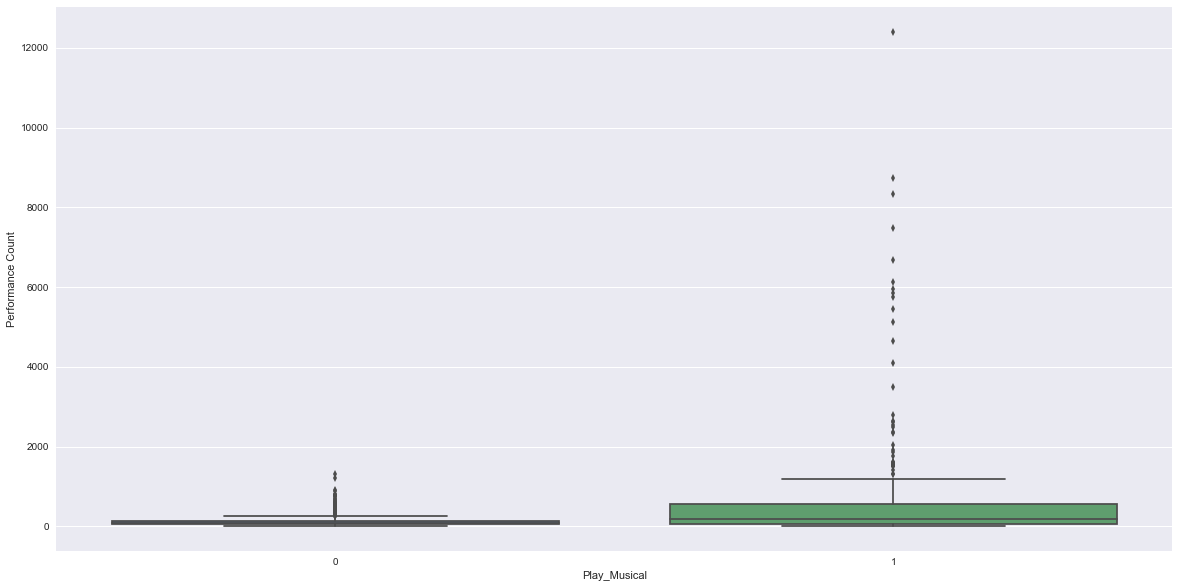

In [67]:
plt.figure(figsize=(20, 10))
sns.boxplot(df['Play_Musical'], df['Performance Count'])

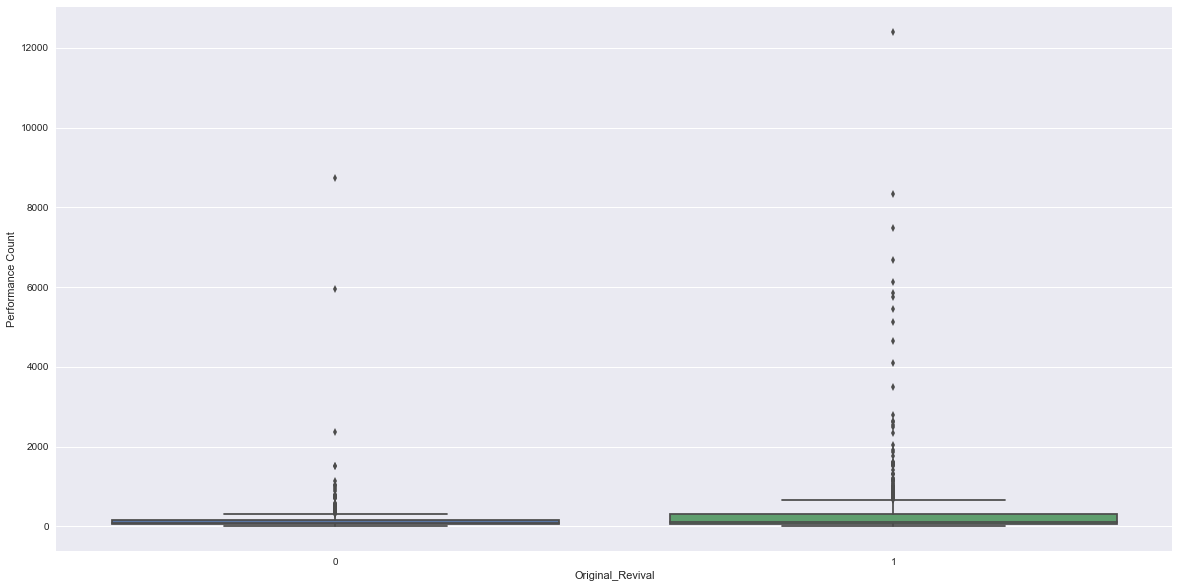

In [66]:
plt.figure(figsize=(20, 10))
sns.boxplot(df['Original_Revival'], df['Performance Count'])

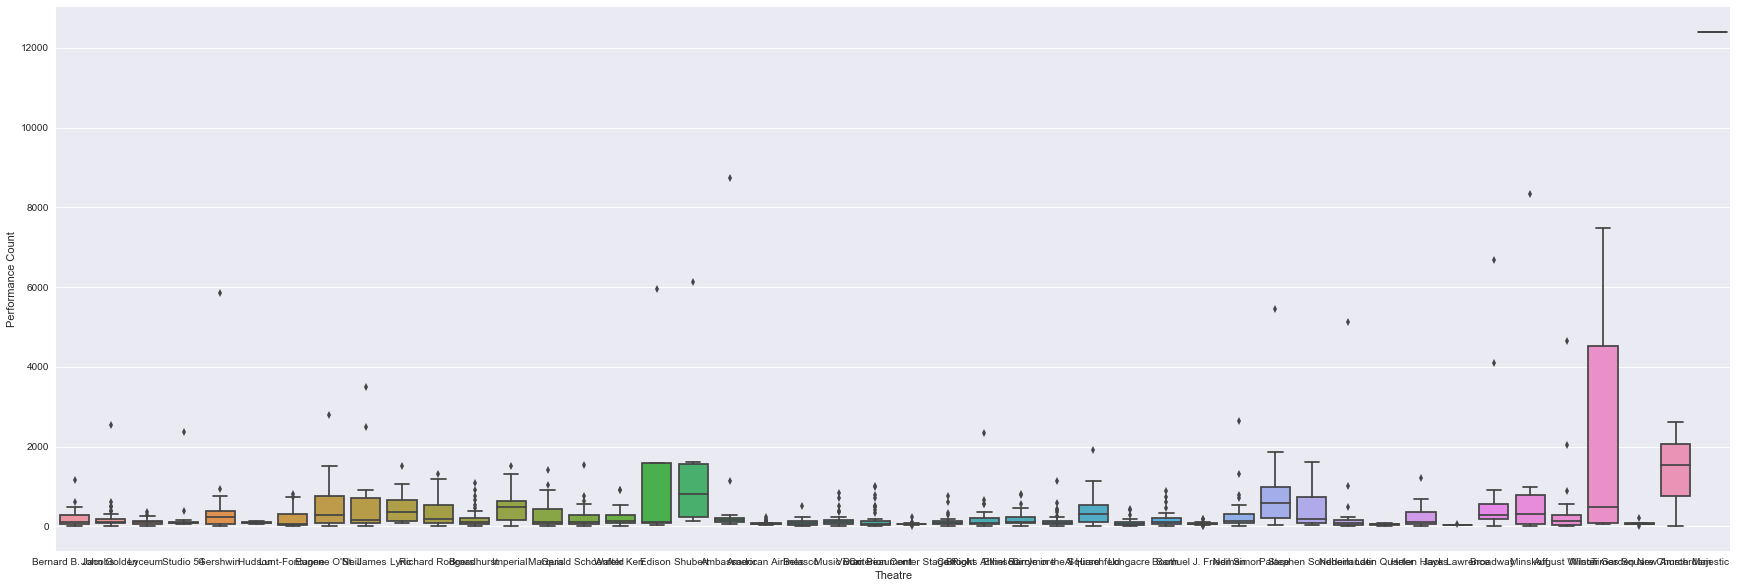

In [69]:
plt.figure(figsize=(30, 10))
sns.boxplot(df['Theatre'], df['Performance Count'])

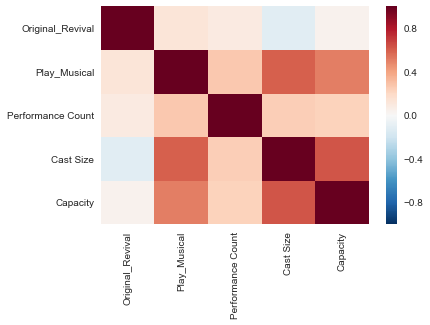

In [65]:
sns.heatmap(df.corr())